In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
X = pd.read_table('kmeans2.csv', delimiter =',')
X = X.sample(2000)

In [10]:
X.head()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
106367,32,93.0,36.5,15.0,1.0,171.0,18.0,1.0
129740,28,97.0,36.7,15.0,4.0,98.0,18.0,1.0
127617,8,96.0,36.5,15.0,4.0,95.0,18.0,1.0
30805,54,99.0,36.2,15.0,6.0,241.0,18.0,1.0
83446,71,91.0,39.0,15.0,4.0,257.0,18.0,1.0


In [39]:
X = X.fillna(0)

PAC_EDAD


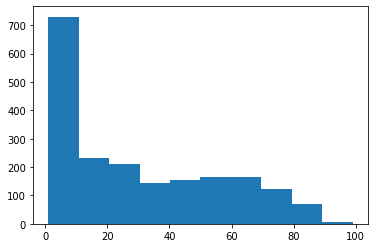

SATO2


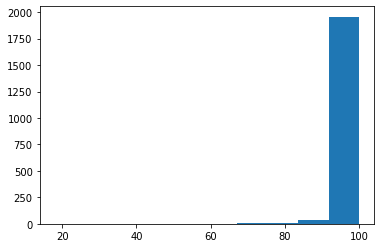

TEMPERATURA


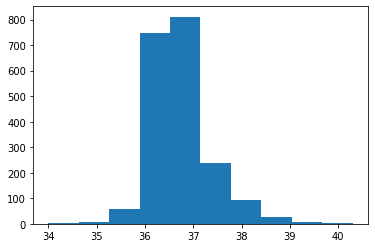

GLASGOW


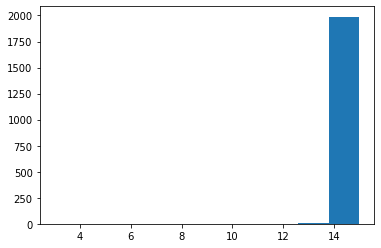

EVA


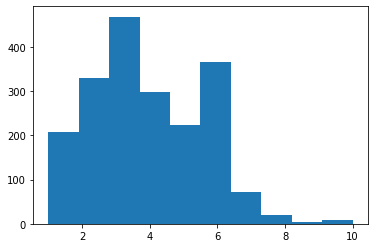

HGT


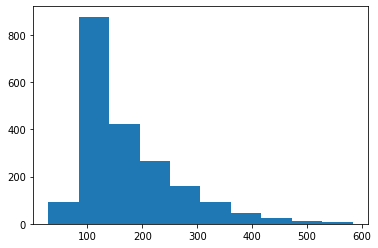

FR


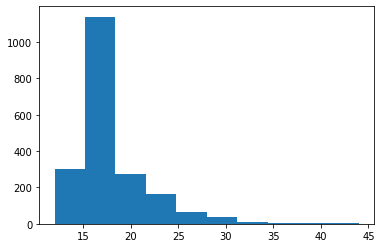

DIAS_HOSP


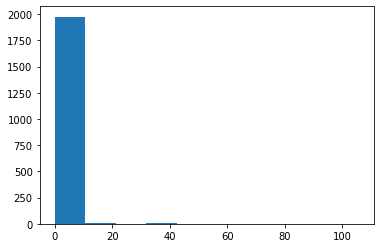

In [41]:
for i in X.columns:
    print(i)
    plt.hist(X[i])
    plt.show()

In [42]:
X.columns[0]

'PAC_EDAD'

In [43]:
X.min()

PAC_EDAD        1.0
SATO2          18.0
TEMPERATURA    34.0
GLASGOW         3.0
EVA             1.0
HGT            29.0
FR             12.0
DIAS_HOSP       0.0
dtype: float64

In [44]:
X=((X-X.min())/(X.max()-X.min()))
X.head()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
29424,0.010204,0.987805,0.523810,1.0,0.111111,0.317690,0.18750,0.009434
98028,0.448980,0.975610,0.396825,1.0,0.222222,0.223827,0.18750,0.009434
65409,0.000000,0.975610,0.317460,1.0,0.333333,0.218412,0.21875,0.009434
94946,0.265306,0.987805,0.476190,1.0,0.333333,0.146209,0.12500,0.009434
65899,0.612245,0.975610,0.444444,1.0,0.222222,0.222022,0.09375,0.009434


In [46]:
from sklearn.cluster import KMeans, AgglomerativeClustering
k_means_2 = KMeans(n_clusters=6)
k_means_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
AgCluster = AgglomerativeClustering(n_clusters=6)
AgCluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [48]:
AgCluster.labels_

array([0, 5, 0, ..., 0, 2, 4])

In [49]:
k_means_2.cluster_centers_

array([[0.69355418, 0.95048952, 0.39716074, 0.99090376, 0.20187793,
        0.2511504 , 0.18364877, 0.01199176],
       [0.11195701, 0.96708464, 0.45807832, 0.99738767, 0.55555556,
        0.21965642, 0.25577978, 0.01842432],
       [0.25016458, 0.97187254, 0.42908346, 1.        , 0.33154122,
        0.60834207, 0.17473118, 0.01333942],
       [0.59511791, 0.96169094, 0.41230579, 0.99293286, 0.55084413,
        0.25412356, 0.17999117, 0.01093406],
       [0.33937894, 0.9670205 , 0.41997574, 0.99972315, 0.23181986,
        0.20178826, 0.1557309 , 0.01379051],
       [0.05676529, 0.96648773, 0.45140629, 0.99880383, 0.15488215,
        0.21733773, 0.2210925 , 0.012052  ]])

In [51]:
minimo = X['DIAS_HOSP'].min()
maximo = X['DIAS_HOSP'].max()
k_means_2.cluster_centers_[3][2]*(maximo-minimo)+minimo

0.41230579393123584

Cluster 1: En cluster encontramos pacientes niños,.....



In [52]:
k_means_2.inertia_

123.35123555298786

In [53]:
k_means_2.labels_

array([5, 4, 5, ..., 5, 3, 0], dtype=int32)

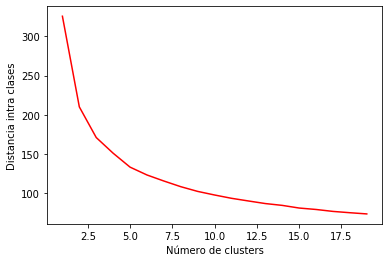

In [54]:
resultados = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    resultados[k] = kmeans.inertia_
plt.figure()
plt.plot(list(resultados.keys()), list(resultados.values()), color ='r')
plt.xlabel("Número de clusters")
plt.ylabel("Distancia intra clases")
plt.show()

asfsbdfljsdbvSB

In [55]:
k = 3
k_means_2 = KMeans(n_clusters=k)
k_means_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
X.head()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
29424,0.010204,0.987805,0.523810,1.0,0.111111,0.317690,0.18750,0.009434
98028,0.448980,0.975610,0.396825,1.0,0.222222,0.223827,0.18750,0.009434
65409,0.000000,0.975610,0.317460,1.0,0.333333,0.218412,0.21875,0.009434
94946,0.265306,0.987805,0.476190,1.0,0.333333,0.146209,0.12500,0.009434
65899,0.612245,0.975610,0.444444,1.0,0.222222,0.222022,0.09375,0.009434


In [57]:
#del X['clase']
columnas = X.columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Xnew = pca.transform(X)
Xnew = pd.DataFrame(Xnew, columns=['c1', 'c2'])

In [58]:
Xnew['clase'] = k_means_2.labels_

0
1
2


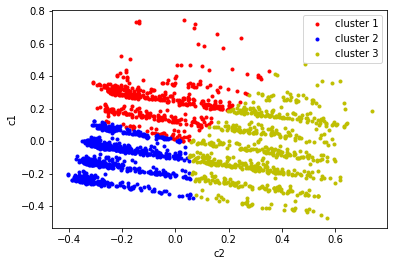

In [59]:
colores = ['r.', 'b.', 'y.', 'g.','k.', 'c.']
for i in range(0,k):
    print(i)
    plt.plot(Xnew['c1'][Xnew['clase']==i],Xnew['c2'][Xnew['clase']==i],colores[i], label='cluster '+str(i+1))
plt.ylabel('c1')
plt.xlabel('c2')
plt.legend()
plt.show()

In [26]:
k_means_2.cluster_centers_

array([[-6.93889390e-15,  1.15686275e-01,  1.76470588e-01,
         1.00000000e+00,  5.15686275e-01,  6.32840066e-01,
         7.40517887e-01,  6.89448981e-01,  2.37429868e-01,
         4.63474380e-01],
       [ 1.00000000e+00,  7.67790262e-02,  1.55430712e-01,
         1.00000000e+00,  5.03745318e-01,  6.36665101e-01,
         7.61124085e-01,  6.90905253e-01,  2.26837567e-01,
         4.71328031e-01],
       [ 4.81171548e-01,  1.73640167e-01,  1.50627615e-01,
         5.88418203e-15,  4.91108787e-01,  4.52082393e-01,
         7.61200902e-01,  7.03070938e-01,  2.45091129e-01,
         4.46587412e-01]])